1. Tree-based models (very popular, often best starting point)  
	•	Random Forest (good baseline, very robust)  
	Gradient Boosting models:  
	•	XGBoost  
	•	LightGBM  
	•	CatBoost (good if you have categorical variables, not your case but still strong)  

In [33]:
# import pandas as pd

# # Load balanced dataset
# df_smote = pd.read_csv('df_smote.csv')

# # Separate features and target
# X = df_smote.drop('Label', axis=1)
# y = df_smote['Label']

# print("Shape of X:", X.shape)
# print("Unique classes:", y.nunique())

import pandas as pd
df_smote_1000 = pd.read_csv('../Data/df_smote_1000.csv')
df_smote_2500 = pd.read_csv('../Data/df_smote_2500.csv')


In [36]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

# # Encode string labels as numbers
# le = LabelEncoder()
# df_smote['Label_encoded'] = le.fit_transform(df_smote['Label'])

# # Use Label_encoded for training
# X = df_smote.drop(['Label', 'Label_encoded'], axis=1)
# y = df_smote['Label_encoded']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# Create label encoders
le_1000 = LabelEncoder()
df_smote_1000['Label_encoded'] = le_1000.fit_transform(df_smote_1000['Label'])

le_2500 = LabelEncoder()
df_smote_2500['Label_encoded'] = le_2500.fit_transform(df_smote_2500['Label'])


# For SMOTE 1000
X_1000 = df_smote_1000.drop(['Label', 'Label_encoded'], axis=1)
y_1000 = df_smote_1000['Label_encoded']

# For SMOTE 2500
X_2500 = df_smote_2500.drop(['Label', 'Label_encoded'], axis=1)
y_2500 = df_smote_2500['Label_encoded']

# Create scalers
scaler_1000 = StandardScaler()
X_1000_scaled = scaler_1000.fit_transform(X_1000)

scaler_2500 = StandardScaler()
X_2500_scaled = scaler_2500.fit_transform(X_2500)



In [37]:
from sklearn.model_selection import train_test_split

# SMOTE 1000
X_train_1000, X_test_1000, y_train_1000, y_test_1000 = train_test_split(
    X_1000_scaled, y_1000, test_size=0.2, random_state=42, stratify=y_1000)

# SMOTE 2500
X_train_2500, X_test_2500, y_train_2500, y_test_2500 = train_test_split(
    X_2500_scaled, y_2500, test_size=0.2, random_state=42, stratify=y_2500)


Decision Tree (SMOTE 1000) Accuracy: 0.6151470588235294
              precision    recall  f1-score   support

           0       0.37      0.36      0.37       200
           1       0.31      0.33      0.32       200
           2       0.47      0.44      0.45       200
           3       0.38      0.41      0.39       200
           4       0.96      0.97      0.97       200
           5       0.81      0.74      0.77       200
           6       1.00      0.99      1.00       200
           7       0.99      0.98      0.99       200
           8       1.00      0.99      0.99       200
           9       1.00      0.99      0.99       200
          10       0.87      0.85      0.86       200
          11       0.44      0.45      0.44       200
          12       0.38      0.39      0.38       200
          13       0.56      0.53      0.54       200
          14       0.66      0.70      0.68       200
          15       0.98      0.96      0.97       200
          16       0.38  

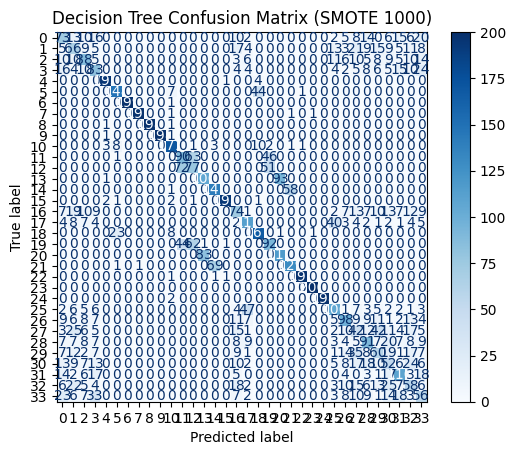

Decision Tree (SMOTE 2500) Accuracy: 0.6632941176470588
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       500
           1       0.37      0.37      0.37       500
           2       0.56      0.56      0.56       500
           3       0.48      0.56      0.52       500
           4       0.98      0.99      0.99       500
           5       0.80      0.83      0.81       500
           6       1.00      0.99      0.99       500
           7       0.99      0.99      0.99       500
           8       1.00      1.00      1.00       500
           9       1.00      1.00      1.00       500
          10       0.90      0.89      0.89       500
          11       0.47      0.47      0.47       500
          12       0.41      0.42      0.41       500
          13       0.56      0.56      0.56       500
          14       0.65      0.65      0.65       500
          15       0.98      0.99      0.98       500
          16       0.49  

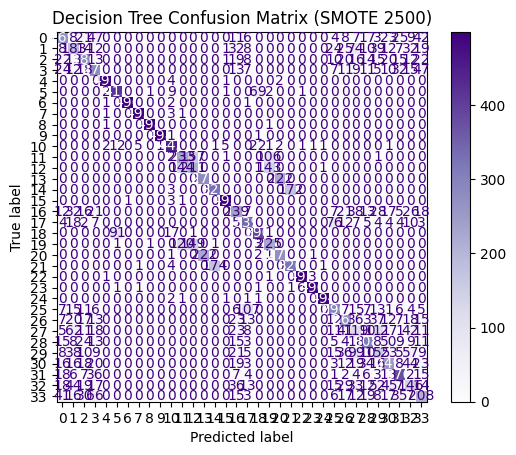

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Decision Tree on SMOTE 1000 ---
dt_1000 = DecisionTreeClassifier(random_state=42)
dt_1000.fit(X_train_1000, y_train_1000)
y_pred_dt_1000 = dt_1000.predict(X_test_1000)

print("Decision Tree (SMOTE 1000) Accuracy:", accuracy_score(y_test_1000, y_pred_dt_1000))
print(classification_report(y_test_1000, y_pred_dt_1000))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_1000, y_pred_dt_1000, cmap='Blues')
plt.title('Decision Tree Confusion Matrix (SMOTE 1000)')
plt.show()

# --- Decision Tree on SMOTE 2500 ---
dt_2500 = DecisionTreeClassifier(random_state=42)
dt_2500.fit(X_train_2500, y_train_2500)
y_pred_dt_2500 = dt_2500.predict(X_test_2500)

print("Decision Tree (SMOTE 2500) Accuracy:", accuracy_score(y_test_2500, y_pred_dt_2500))
print(classification_report(y_test_2500, y_pred_dt_2500))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_2500, y_pred_dt_2500, cmap='Purples')
plt.title('Decision Tree Confusion Matrix (SMOTE 2500)')
plt.show()


Random Forest (SMOTE 1000) Accuracy: 0.6598529411764706
              precision    recall  f1-score   support

           0       0.52      0.28      0.37       200
           1       0.31      0.60      0.41       200
           2       0.58      0.42      0.49       200
           3       0.72      0.29      0.41       200
           4       0.98      0.99      0.99       200
           5       0.93      0.77      0.84       200
           6       0.99      0.99      0.99       200
           7       1.00      0.99      0.99       200
           8       1.00      0.99      0.99       200
           9       1.00      0.99      0.99       200
          10       0.86      0.96      0.91       200
          11       0.44      0.70      0.55       200
          12       0.39      0.29      0.34       200
          13       0.68      0.51      0.58       200
          14       0.68      0.85      0.76       200
          15       0.98      0.97      0.98       200
          16       0.46  

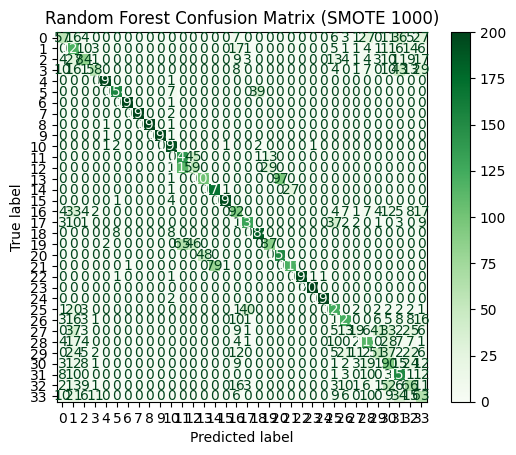

Random Forest (SMOTE 2500) Accuracy: 0.687764705882353
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       500
           1       0.34      0.70      0.46       500
           2       0.67      0.48      0.56       500
           3       0.79      0.36      0.50       500
           4       0.99      0.99      0.99       500
           5       0.91      0.80      0.85       500
           6       1.00      0.99      1.00       500
           7       1.00      0.99      0.99       500
           8       1.00      1.00      1.00       500
           9       1.00      1.00      1.00       500
          10       0.88      0.98      0.93       500
          11       0.48      0.83      0.61       500
          12       0.53      0.29      0.37       500
          13       0.65      0.45      0.53       500
          14       0.68      0.82      0.74       500
          15       0.99      0.99      0.99       500
          16       0.62   

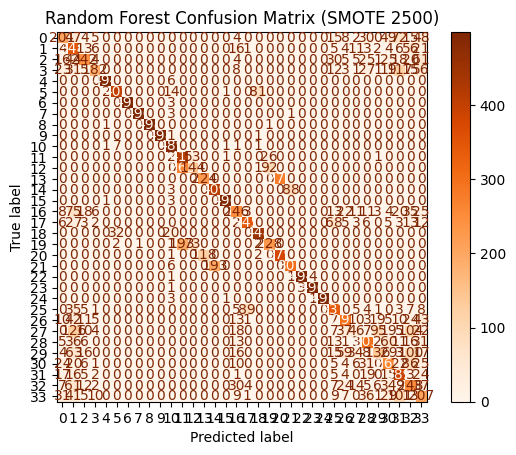

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Random Forest on SMOTE 1000 ---
rf_1000 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15)
rf_1000.fit(X_train_1000, y_train_1000)
y_pred_rf_1000 = rf_1000.predict(X_test_1000)

print("Random Forest (SMOTE 1000) Accuracy:", accuracy_score(y_test_1000, y_pred_rf_1000))
print(classification_report(y_test_1000, y_pred_rf_1000))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_1000, y_pred_rf_1000, cmap='Greens')
plt.title('Random Forest Confusion Matrix (SMOTE 1000)')
plt.show()

# --- Random Forest on SMOTE 2500 ---
rf_2500 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15)
rf_2500.fit(X_train_2500, y_train_2500)
y_pred_rf_2500 = rf_2500.predict(X_test_2500)

print("Random Forest (SMOTE 2500) Accuracy:", accuracy_score(y_test_2500, y_pred_rf_2500))
print(classification_report(y_test_2500, y_pred_rf_2500))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_2500, y_pred_rf_2500, cmap='Oranges')
plt.title('Random Forest Confusion Matrix (SMOTE 2500)')
plt.show()


c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (SMOTE 1000) Accuracy: 0.6730882352941177
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       200
           1       0.44      0.53      0.48       200
           2       0.47      0.47      0.47       200
           3       0.41      0.41      0.41       200
           4       0.97      0.99      0.98       200
           5       0.91      0.81      0.86       200
           6       1.00      0.99      1.00       200
           7       1.00      0.99      0.99       200
           8       1.00      0.98      0.99       200
           9       1.00      0.99      0.99       200
          10       0.90      0.97      0.93       200
          11       0.43      0.54      0.48       200
          12       0.34      0.30      0.32       200
          13       0.59      0.55      0.57       200
          14       0.66      0.73      0.70       200
          15       0.97      0.97      0.97       200
          16       0.48      0.

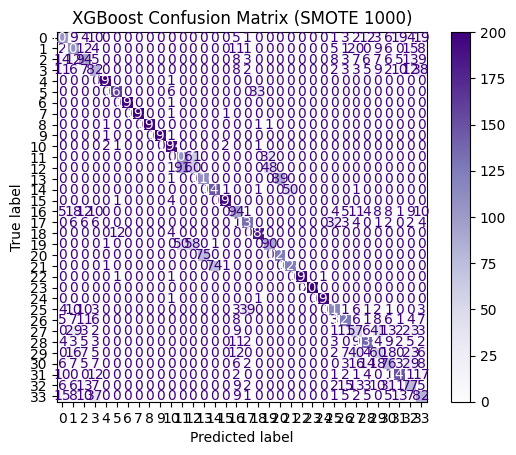

c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (SMOTE 2500) Accuracy: 0.7410588235294118
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       500
           1       0.46      0.61      0.52       500
           2       0.73      0.72      0.73       500
           3       0.75      0.71      0.73       500
           4       1.00      0.99      0.99       500
           5       0.89      0.85      0.87       500
           6       1.00      0.99      1.00       500
           7       1.00      0.99      0.99       500
           8       1.00      1.00      1.00       500
           9       1.00      1.00      1.00       500
          10       0.92      0.98      0.94       500
          11       0.46      0.63      0.53       500
          12       0.46      0.37      0.41       500
          13       0.58      0.55      0.57       500
          14       0.69      0.78      0.73       500
          15       0.99      1.00      0.99       500
          16       0.58      0.

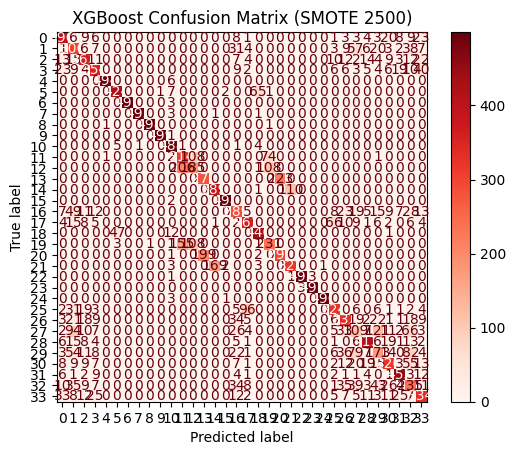

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- XGBoost on SMOTE 1000 ---
xgb_1000 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=100, max_depth=8)
xgb_1000.fit(X_train_1000, y_train_1000)
y_pred_xgb_1000 = xgb_1000.predict(X_test_1000)

print("XGBoost (SMOTE 1000) Accuracy:", accuracy_score(y_test_1000, y_pred_xgb_1000))
print(classification_report(y_test_1000, y_pred_xgb_1000))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_1000, y_pred_xgb_1000, cmap='Purples')
plt.title('XGBoost Confusion Matrix (SMOTE 1000)')
plt.show()

# --- XGBoost on SMOTE 2500 ---
xgb_2500 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=100, max_depth=8)
xgb_2500.fit(X_train_2500, y_train_2500)
y_pred_xgb_2500 = xgb_2500.predict(X_test_2500)

print("XGBoost (SMOTE 2500) Accuracy:", accuracy_score(y_test_2500, y_pred_xgb_2500))
print(classification_report(y_test_2500, y_pred_xgb_2500))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_2500, y_pred_xgb_2500, cmap='Reds')
plt.title('XGBoost Confusion Matrix (SMOTE 2500)')
plt.show()
